# CNN for Image Classification

In [41]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import cv2

## Loading Images

In [42]:
!pwd
path_current_directory = "/Users/magdalenablum-oeste/Google Drive/GitHubMBO/ComputerVisionMasterclass/CNN_Image_Classification"
os.chdir(path_current_directory)
!pwd

/Users/magdalenablum-oeste/Google Drive/GitHubMBO/ComputerVisionMasterclass/CNN_Image_Classification
/Users/magdalenablum-oeste/Google Drive/GitHubMBO/ComputerVisionMasterclass/CNN_Image_Classification


In [43]:
# url = 'https://drive.google.com/file/d/1iLvIKMcYgVN_xK7jffMPQ3PW3uhPC9fv/view?usp=sharing'
# import urllib.request

In [44]:
path = 'homer_bart_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

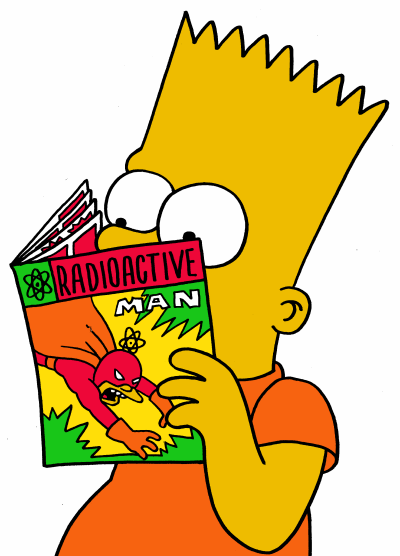

In [45]:
#### Visualize an image
tf.keras.preprocessing.image.load_img('/Users/magdalenablum-oeste/Google Drive/GitHubMBO/ComputerVisionMasterclass/CNN_Image_Classification/homer_bart_2/training_set/bart/bart29.bmp')

### Test and Train Set

[ImageDataGenerator class to perform data augmentation](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/)

In [46]:
# ImageDataGenerator() generates batches of tensor image data 
# with real-time data augmentation.

# Using this function, in addition to the original images, we will also have new images 
# with application of these pre-processing

# This function creates only parameters
training_generator = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2)

In [47]:
!pwd

/Users/magdalenablum-oeste/Google Drive/GitHubMBO/ComputerVisionMasterclass/CNN_Image_Classification


In [48]:
# Apply to images and create train dataset
train_dataset = training_generator.flow_from_directory('homer_bart_2/training_set',
                                                   target_size=(64, 64),
                                                   batch_size=8,
                                                   class_mode='categorical',
                                                   shuffle=True)
# This function recognizes two directories (bart and homer) 
# in the training_set directory
# as two classes

Found 215 images belonging to 2 classes.


In [49]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [50]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [54]:
# In Test, we set this parameter to FALSE because when testing, 
# the order of the images makes no difference. 
# If we leave the value equals TRUE, we will not be able to associate the 
# predictions with the expected outputs

test_generator = ImageDataGenerator(rescale=1./255) # only normalize, because don't need new images
test_dataset = test_generator.flow_from_directory('homer_bart_2/test_set',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 54 images belonging to 2 classes.


In [65]:
# Check attributes
dir(test_dataset)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',
 'save_to_dir',
 'see

## Building and Training CNN
Instead of `fit.`, we use `fit_generator.` because we created `train_dataset` using `training_generator`.

In [67]:
# image pixels
64 * 64

4096

In [83]:
# flatten
1152 
# neurons in the hidden layer
(1152 + 2) / 2

577.0

In [84]:
network = Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(64, 64, 3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=2, activation='softmax')) # softmax returns probability for each of classes
# softmax because class_mode=categorical
# sigmoid for class_mode=binary and units=1
network.summary()            

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [85]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])
# if class_mode=binary then binary_crossentropy

In [86]:
history = network.fit_generator(train_dataset, epochs=50, validation_data=test_dataset)
# use fit_generator instead of fit when ImageDataGenerator used to create the dataset

/Users/magdalenablum-oeste/opt/anaconda3/envs/cvudacity/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
27/27 [==============================] - 2s 45ms/step - loss: 0.7973 - accuracy: 0.4516 - val_loss: 0.6906 - val_accuracy: 0.5185
Epoch 2/50
27/27 [==============================] - 1s 34ms/step - loss: 0.6657 - accuracy: 0.6018 - val_loss: 0.6700 - val_accuracy: 0.5185
Epoch 3/50
27/27 [==============================] - 1s 34ms/step - loss: 0.6339 - accuracy: 0.6349 - val_loss: 0.6490 - val_accuracy: 0.6111
Epoch 4/50
27/27 [==============================] - 1s 33ms/step - loss: 0.4637 - accuracy: 0.7777 - val_loss: 0.4884 - val_accuracy: 0.7778
Epoch 5/50
27/27 [==============================] - 1s 35ms/step - loss: 0.4580 - accuracy: 0.8020 - val_loss: 0.5724 - val_accuracy: 0.7593
Epoch 6/50
27/27 [==============================] - 1s 33ms/step - loss: 0.3788 - accuracy: 0.7805 - val_loss: 0.5487 - val_accuracy: 0.7037
Epoch 7/50
27/27 [==============================] - 1s 33ms/step - loss: 0.4101 - accuracy: 0.7793 - val_loss: 0.4695 - val_accuracy: 0.7593
Epoch 8/50
27

## Evaluation

In [88]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

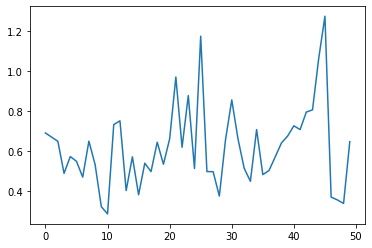

In [89]:
plt.plot(history.history['val_loss']);

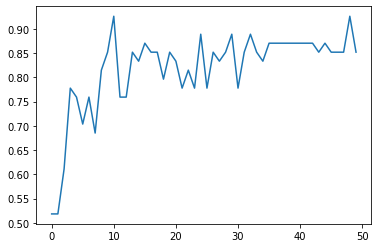

In [91]:
plt.plot(history.history['val_accuracy']);

## Prediction

In [94]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [100]:
predictions = network.predict(test_dataset)
predictions
# predictions show probabilities for two categories
# first position is bart, second is homer

array([[1.00000000e+00, 4.03944253e-15],
       [1.00000000e+00, 4.23043030e-13],
       [8.74585181e-04, 9.99125421e-01],
       [1.00000000e+00, 9.06611233e-16],
       [1.00000000e+00, 4.39398257e-15],
       [1.00000000e+00, 2.07021036e-14],
       [1.00000000e+00, 8.68722666e-15],
       [1.88153908e-01, 8.11846077e-01],
       [1.38972253e-01, 8.61027777e-01],
       [5.56939900e-01, 4.43060011e-01],
       [9.96172965e-01, 3.82708968e-03],
       [1.00000000e+00, 7.14666119e-13],
       [9.98638213e-01, 1.36182399e-03],
       [9.99978542e-01, 2.15024120e-05],
       [1.00000000e+00, 5.06672666e-13],
       [1.00000000e+00, 2.56243227e-21],
       [7.60493008e-03, 9.92395043e-01],
       [1.00000000e+00, 9.97584149e-09],
       [9.98701453e-01, 1.29853608e-03],
       [1.00000000e+00, 1.47037445e-15],
       [9.98573661e-01, 1.42635230e-03],
       [1.00000000e+00, 7.07671252e-16],
       [9.99987245e-01, 1.27114090e-05],
       [6.20574720e-05, 9.99937892e-01],
       [1.000000

In [101]:
# We have to extract the index (position - bart or homer) with the max value
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [102]:
# the predictions above compare to classes
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.8518518518518519

<AxesSubplot:>

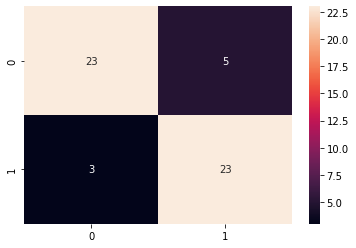

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True);

In [107]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.82      0.88      0.85        26

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



0 means bart, 1 means homer. The CNN can correctly identify 82% of bart images, and when it identifies, it is correct in 88% of the cases.

## Save and Load the Model

### Save

In [111]:
model_json = network.to_json()
with open ('network.json', 'w') as json_file:
    json_file.write(model_json)

In [112]:
!pwd

/Users/magdalenablum-oeste/Google Drive/GitHubMBO/ComputerVisionMasterclass/CNN_Image_Classification


In [116]:
from tensorflow.keras.models import save_model
network_saved = save_model(network, 'weights.hdf5')

### Load

In [117]:
with open('network.json', 'r') as json_file:
    json_saved_model = json_file.read()

json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_4_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_4", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_3", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2

In [122]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)

network_loaded.load_weights('weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [123]:
network_loaded.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

## Classifying One Single Image

### Load and preprocess an image

In [150]:
image = cv2.imread('homer_bart_2/test_set/homer/homer15.bmp')

In [151]:
cv2.imshow('image', image)
cv2.waitKey(1)
cv2.destroyAllWindows()

In [152]:
image.shape

(536, 514, 3)

In [153]:
image = cv2.resize(image, (64, 64))
cv2.imshow('image', image)
cv2.waitKey(1)
cv2.destroyAllWindows()

In [154]:
image = image / 255

In [155]:
image

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [156]:
image.shape

(64, 64, 3)

In [157]:
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [158]:
result = network_loaded(image)
result

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.01187118, 0.98812884]], dtype=float32)>

In [159]:
result = np.argmax(result)
result

1

In [160]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [161]:
if result == 0:
  print('Bart')
else:
  print('Homer')

Homer
